In [125]:
import os, json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [330]:
#Histogram Plot
def hist_plot(data):
    fields=list(data.select_dtypes([np.number]).columns)
    l=len(list(data.select_dtypes([np.number]).columns))
    plt.figure(figsize=(20,40))
    for i in range(l):
        plt.subplot(8,3,i+1)
        mean=data[fields[i]].mean()
        median=data[fields[i]].median()
        mode=data[fields[i]].mode().values[0]
        sns.histplot(data[fields[i]],kde = True)
        plt.axvline(median,color='blue',ls='-', lw=2.5)
        plt.axvline(mean,color='red',ls='--', lw=2.5)
        plt.axvline(mode,color='black',ls='--', lw=2.5)

In [10]:
# fraction of null values in each field
def null_fraction(data):
    max_l = len(max(list(data.columns),key = len))+1
    for field in list(data.columns):
        print(field.ljust(max_l,' ')+':'+str(data[field].isnull().mean()))

In [17]:
# fraction of -ve value values in each field
def negative_fraction(data):
    fields=list(data.select_dtypes([np.number]).columns)
    max_l = len(max(fields,key = len))+1
    for field in fields:
        print(field.ljust(max_l,' '),':',data[data[field]<0][field].count()/(data[field].count()))

## Picking any random file from 'VA00000000000017' folder to see the Data distribution

lc0        : 0.0
lc1        : 0.0
lc2        : 0.0
lc3        : 0.3289170506912442
timestamp  : 0.0
sum        : 0.0
None


,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo2MWE0NzMzZS02NTkzLTRlNm...,2020-09-03T06:57:17-05:00,"[cat in box, urination]",None,Ryan,6139,None


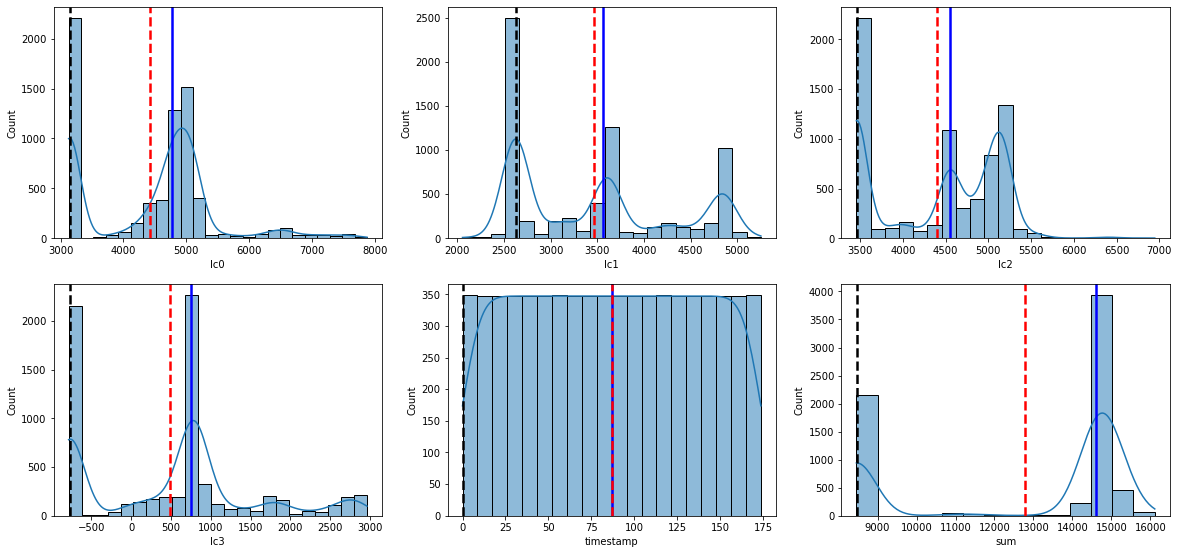

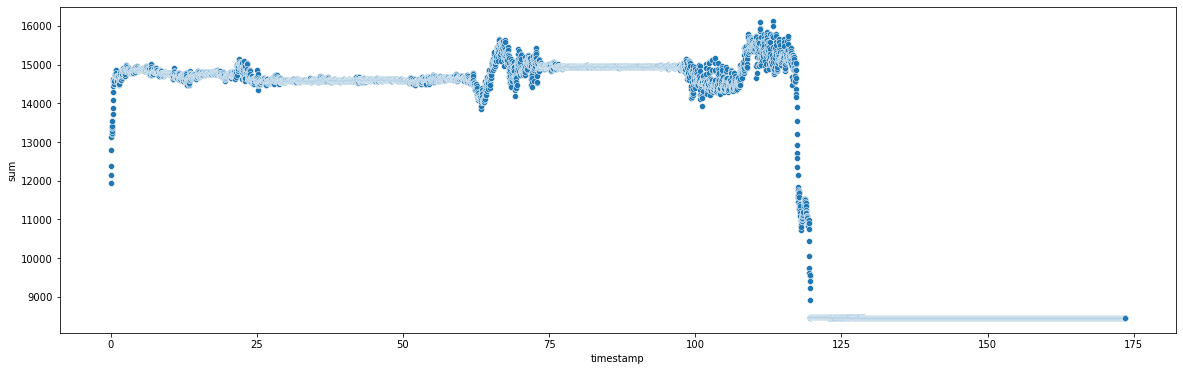

In [483]:

path1 = r"C:\Users\subhasis.sahoo\Desktop\tiger_analytics\pip_case_study\Raw_data\VA00000000000017"


list_of_csv_file = [file for file in os.listdir(path1) if file.endswith('.csv')]
rand_indx = random.randrange(len(list_of_csv_file))
random_file = list_of_csv_file[rand_indx]
random_file_path = ''.join((path1,'/',random_file))
random_file_json_path = random_file_path[:-4]+'.json'
df_json_random = pd.read_json(random_file_json_path,orient='index').transpose()
df_csv_random = pd.read_csv(random_file_path)
print(negative_fraction(df_csv_random))
hist_plot(df_csv_random)
plt.figure(figsize=(20,6))
sns.scatterplot(x='timestamp',y='sum',data=df_csv_random)
df_json_random

# Creating a Raw Dataset

In [391]:
#feature extraction from csv file and binning of Total weight(sum) withrespect to time into 10 bin
def feature_extraction(df):
    l1 =[]
    l1.append(df.iloc[-1]['timestamp'])
    l2 = ['Event_Time']
    inside = df[df['sum']>df['sum'].mean()]['sum'].count()*0.025
    l1.append(inside)
    l2.append('In_Time')
    l1.append(df['sum'].std())
    l2.append('Std')
    bin_interval = df.iloc[-1]['timestamp']/10
    for i in range(1,11):
        mask = df[(df['timestamp']>(i-1)*bin_interval) & (df['timestamp']<i*bin_interval)]
        l1.append(mask['sum'].mode().values[0])
        l2.append('Time_Stage_'+str(i))
    df_csv_row = pd.DataFrame(l1,index=l2).transpose()
    return df_csv_row

In [490]:

path = r"C:\Users\subhasis.sahoo\Desktop\tiger_analytics\pip_case_study\Raw_data"
df= pd.DataFrame()
df_csv = pd.DataFrame()
df_json = pd.DataFrame()

#Reading each csv file, extracting features and then concatinating all to a single dataframe
for folder in os.listdir(path):
    VA_folder = ''.join((path,'/',folder))
    for file in os.listdir(VA_folder):
        if file.endswith('.csv'):
            with open(os.path.join(VA_folder,file)) as csv_file:
                df_each_csv = pd.read_csv(csv_file)
                l = ['lc0','lc1','lc2','lc3']
                #replacing all the -ve load censor data to the +ve axis by adding the mod of minimum value of that feature column to each row data
                for feature in l:
                    if df_each_csv[df_each_csv[feature]<0][feature].count()>0:
                        df_each_csv[feature] = df_each_csv[feature]-df_each_csv[feature].min()
                df_each_csv['sum'] = df_each_csv[['lc0','lc1','lc2','lc3']].sum(axis=1)
                df_each_csv_final = feature_extraction(df_each_csv).copy()
                df_csv = pd.concat([df_csv,df_each_csv_final],ignore_index=True)
                
#Reading and concatinationg all jason file to a single dataframe                 
for folder in os.listdir(path):
    VA_folder = ''.join((path,'/',folder))
    for file in os.listdir(VA_folder):                
        if file.endswith('.json'):
            with open(os.path.join(VA_folder,file)) as json_file:
                df_each_json=pd.read_json(json_file,orient='index').transpose()
                df_json = pd.concat([df_json,df_each_json],ignore_index=True)
#Concatinating both json dataframe and csv dataframe 
df_raw = pd.concat([df_json,df_csv],axis = 1)
df_raw

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05T10:56:11-05:00,"[urination, cat in box]",None,Ryan,6589,None,151.974936,44.575,...,16573.0,16565.0,10002.0,9993.0,9990.0,9987.0,9986.0,9985.0,9984.0,9984.0
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18T14:41:37-05:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,None,111.975000,52.675,...,16078.0,16278.0,16253.0,16246.0,9352.0,9329.0,9327.0,9325.0,9325.0,9324.0
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03T15:43:43-05:00,"[cat in box, urination]",None,Ryan,5139,None,102.374944,44.150,...,14241.0,13895.0,13846.0,14149.0,8880.0,8833.0,8795.0,8782.0,8758.0,8745.0
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01T12:02:05-05:00,"[non_elimination, cat in box]",None,Ryan,6983,None,66.374940,11.600,...,15720.0,8805.0,8801.0,8798.0,8796.0,8794.0,8793.0,8792.0,8792.0,8791.0
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08T06:47:11-05:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,None,82.375000,48.800,...,12120.0,11953.0,12189.0,12222.0,12213.0,12188.0,5213.0,5209.0,5206.0,5205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24T01:36:18-05:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,11363.0,10520.0,10677.0,11148.0,11142.0,10705.0,11237.0,11227.0,7030.0,7031.0
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26T06:29:01-05:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7772.0,7767.0,7754.0,7764.0,12173.0,7751.0,7748.0,7748.0,7746.0,7758.0
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27T03:47:55-05:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,12088.0,12086.0,12084.0,12054.0,12104.0,7681.0,7675.0,7673.0,7672.0,7670.0
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02T01:15:57-05:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,11994.0,12032.0,12029.0,12032.0,12032.0,12028.0,12024.0,12031.0,11972.0,7646.0


In [491]:
df=df_raw.copy()

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Device_ID         13075 non-null  object 
 1   Event_ID          13075 non-null  object 
 2   Event_start_time  13075 non-null  object 
 3   Tags              13075 non-null  object 
 4   Free_text         10648 non-null  object 
 5   Name_of_cat       12829 non-null  object 
 6   Weight_of_cat     13075 non-null  object 
 7   Tare_weight       12063 non-null  object 
 8   Event_Time        13075 non-null  float64
 9   In_Time           13075 non-null  float64
 10  Std               13075 non-null  float64
 11  Time_Stage_1      13075 non-null  float64
 12  Time_Stage_2      13075 non-null  float64
 13  Time_Stage_3      13075 non-null  float64
 14  Time_Stage_4      13075 non-null  float64
 15  Time_Stage_5      13075 non-null  float64
 16  Time_Stage_6      13075 non-null  float6

In [493]:
df['Event_start_time']=pd.to_datetime(df['Event_start_time'],utc=True)
df['Weight_of_cat']=df['Weight_of_cat'].apply(pd.to_numeric)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Device_ID         13075 non-null  object             
 1   Event_ID          13075 non-null  object             
 2   Event_start_time  13075 non-null  datetime64[ns, UTC]
 3   Tags              13075 non-null  object             
 4   Free_text         10648 non-null  object             
 5   Name_of_cat       12829 non-null  object             
 6   Weight_of_cat     13075 non-null  int64              
 7   Tare_weight       12063 non-null  object             
 8   Event_Time        13075 non-null  float64            
 9   In_Time           13075 non-null  float64            
 10  Std               13075 non-null  float64            
 11  Time_Stage_1      13075 non-null  float64            
 12  Time_Stage_2      13075 non-null  float64            
 13  T

In [495]:
negative_fraction(df)

Weight_of_cat  : 0.0
Event_Time     : 0.0
In_Time        : 0.0
Std            : 0.0
Time_Stage_1   : 0.0
Time_Stage_2   : 0.0
Time_Stage_3   : 0.0
Time_Stage_4   : 0.0
Time_Stage_5   : 0.0
Time_Stage_6   : 0.0
Time_Stage_7   : 0.0
Time_Stage_8   : 0.0
Time_Stage_9   : 0.0
Time_Stage_10  : 0.0


In [496]:
null_fraction(df)

Device_ID        :0.0
Event_ID         :0.0
Event_start_time :0.0
Tags             :0.0
Free_text        :0.18562141491395792
Name_of_cat      :0.01881453154875717
Weight_of_cat    :0.0
Tare_weight      :0.07739961759082217
Event_Time       :0.0
In_Time          :0.0
Std              :0.0
Time_Stage_1     :0.0
Time_Stage_2     :0.0
Time_Stage_3     :0.0
Time_Stage_4     :0.0
Time_Stage_5     :0.0
Time_Stage_6     :0.0
Time_Stage_7     :0.0
Time_Stage_8     :0.0
Time_Stage_9     :0.0
Time_Stage_10    :0.0


Text(0.5, 1.0, 'Quantifying missing data')

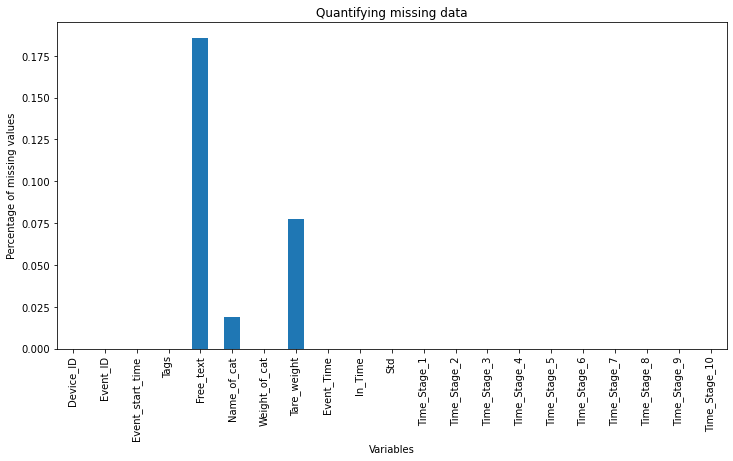

In [497]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [500]:
df[df.astype(str).duplicated()

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10


In [501]:
df.groupby('Device_ID').count()

,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10
Device_ID,,,,,,,,,,,,,,,,,,,,
VA00000000000017,67,67,67,41,67,67,0,67,67,67,67,67,67,67,67,67,67,67,67,67
VA00000000000020,77,77,77,46,75,77,0,77,77,77,77,77,77,77,77,77,77,77,77,77
VA00000000000021,63,63,63,52,61,63,0,63,63,63,63,63,63,63,63,63,63,63,63,63
VA00000000000022,78,78,78,50,78,78,1,78,78,78,78,78,78,78,78,78,78,78,78,78
VA00000000000023,59,59,59,35,59,59,0,59,59,59,59,59,59,59,59,59,59,59,59,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VB00000000000188,147,147,147,108,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
VB00000000000189,105,105,105,69,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
VB00000000000190,214,214,214,175,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214


### Filling Null Values

In [502]:
#Filling null values of a feature with randome datas from the same feature
def fill_na_with_random(data,feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [503]:
fill_na_with_random(df,'Name_of_cat')
fill_na_with_random1(df,'Tare_weight')

In [504]:
df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,16573.0,16565.0,10002.0,9993.0,9990.0,9987.0,9986.0,9985.0,9984.0,9984.0
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,16078.0,16278.0,16253.0,16246.0,9352.0,9329.0,9327.0,9325.0,9325.0,9324.0
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,14241.0,13895.0,13846.0,14149.0,8880.0,8833.0,8795.0,8782.0,8758.0,8745.0
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,15720.0,8805.0,8801.0,8798.0,8796.0,8794.0,8793.0,8792.0,8792.0,8791.0
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,12120.0,11953.0,12189.0,12222.0,12213.0,12188.0,5213.0,5209.0,5206.0,5205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,11363.0,10520.0,10677.0,11148.0,11142.0,10705.0,11237.0,11227.0,7030.0,7031.0
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7772.0,7767.0,7754.0,7764.0,12173.0,7751.0,7748.0,7748.0,7746.0,7758.0
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,12088.0,12086.0,12084.0,12054.0,12104.0,7681.0,7675.0,7673.0,7672.0,7670.0
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,11994.0,12032.0,12029.0,12032.0,12032.0,12028.0,12024.0,12031.0,11972.0,7646.0


In [505]:
null_fraction(df)

Device_ID        :0.0
Event_ID         :0.0
Event_start_time :0.0
Tags             :0.0
Free_text        :0.18562141491395792
Name_of_cat      :0.0
Weight_of_cat    :0.0
Tare_weight      :0.0
Event_Time       :0.0
In_Time          :0.0
Std              :0.0
Time_Stage_1     :0.0
Time_Stage_2     :0.0
Time_Stage_3     :0.0
Time_Stage_4     :0.0
Time_Stage_5     :0.0
Time_Stage_6     :0.0
Time_Stage_7     :0.0
Time_Stage_8     :0.0
Time_Stage_9     :0.0
Time_Stage_10    :0.0


In [506]:
#splitting the tare_weight to load sensor values
for i in range(4):
    df['Tare_weight_lc'+str(i)] = df['Tare_weight'].apply(lambda x: x[i])

In [507]:
df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_5,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,9990.0,9987.0,9986.0,9985.0,9984.0,9984.0,-569,2968,-956,5906
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,9352.0,9329.0,9327.0,9325.0,9325.0,9324.0,287,1147,1046,1314
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,8880.0,8833.0,8795.0,8782.0,8758.0,8745.0,2223,496,926,2584
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,8796.0,8794.0,8793.0,8792.0,8792.0,8791.0,976,1199,3104,-339
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,12213.0,12188.0,5213.0,5209.0,5206.0,5205.0,2691,979,2331,-412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,11142.0,10705.0,11237.0,11227.0,7030.0,7031.0,2340,868,2150,1626
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,12173.0,7751.0,7748.0,7748.0,7746.0,7758.0,3577,400,2043,1747
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,12104.0,7681.0,7675.0,7673.0,7672.0,7670.0,4313,-14729,1754,1697
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,12032.0,12028.0,12024.0,12031.0,11972.0,7646.0,3702,-893,1561,1940


In [508]:
negative_fraction(df)

Weight_of_cat    : 0.0
Event_Time       : 0.0
In_Time          : 0.0
Std              : 0.0
Time_Stage_1     : 0.0
Time_Stage_2     : 0.0
Time_Stage_3     : 0.0
Time_Stage_4     : 0.0
Time_Stage_5     : 0.0
Time_Stage_6     : 0.0
Time_Stage_7     : 0.0
Time_Stage_8     : 0.0
Time_Stage_9     : 0.0
Time_Stage_10    : 0.0
Tare_weight_lc0  : 0.11089866156787763
Tare_weight_lc1  : 0.08826003824091778
Tare_weight_lc2  : 0.11533460803059273
Tare_weight_lc3  : 0.06240917782026768


In [509]:
#replacing the -ve Tare_weight load censor values with the mean of positive values 
df.loc[df['Tare_weight_lc0']<0,'Tare_weight_lc0']=int(df[df['Tare_weight_lc0']>0]['Tare_weight_lc0'].mean())
df.loc[df['Tare_weight_lc1']<0,'Tare_weight_lc1']=int(df[df['Tare_weight_lc1']>0]['Tare_weight_lc1'].mean())
df.loc[df['Tare_weight_lc2']<0,'Tare_weight_lc2']=int(df[df['Tare_weight_lc2']>0]['Tare_weight_lc2'].mean())
df.loc[df['Tare_weight_lc3']<0,'Tare_weight_lc3']=int(df[df['Tare_weight_lc3']>0]['Tare_weight_lc3'].mean())

In [510]:
df['Tare_weight_sum'] = df['Tare_weight_lc0']+df['Tare_weight_lc1']+df['Tare_weight_lc2']+df['Tare_weight_lc3']

In [511]:
df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_6,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,9987.0,9986.0,9985.0,9984.0,9984.0,2717,2968,2847,5906,14438
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,9329.0,9327.0,9325.0,9325.0,9324.0,287,1147,1046,1314,3794
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,8833.0,8795.0,8782.0,8758.0,8745.0,2223,496,926,2584,6229
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,8794.0,8793.0,8792.0,8792.0,8791.0,976,1199,3104,2603,7882
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,12188.0,5213.0,5209.0,5206.0,5205.0,2691,979,2331,2603,8604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,10705.0,11237.0,11227.0,7030.0,7031.0,2340,868,2150,1626,6984
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7751.0,7748.0,7748.0,7746.0,7758.0,3577,400,2043,1747,7767
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,7681.0,7675.0,7673.0,7672.0,7670.0,4313,2386,1754,1697,10150
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,12028.0,12024.0,12031.0,11972.0,7646.0,3702,2386,1561,1940,9589


In [512]:
negative_fraction(df)

Weight_of_cat    : 0.0
Event_Time       : 0.0
In_Time          : 0.0
Std              : 0.0
Time_Stage_1     : 0.0
Time_Stage_2     : 0.0
Time_Stage_3     : 0.0
Time_Stage_4     : 0.0
Time_Stage_5     : 0.0
Time_Stage_6     : 0.0
Time_Stage_7     : 0.0
Time_Stage_8     : 0.0
Time_Stage_9     : 0.0
Time_Stage_10    : 0.0
Tare_weight_lc0  : 0.0
Tare_weight_lc1  : 0.0
Tare_weight_lc2  : 0.0
Tare_weight_lc3  : 0.0
Tare_weight_sum  : 0.0


In [513]:
# Extracting part of the day(early morning, morning, noon, evening, night and late night) from the event start time
def day_part(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [514]:
df['Part_of_day']=df['Event_start_time'].dt.hour.apply(day_part)
df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_7,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,9986.0,9985.0,9984.0,9984.0,2717,2968,2847,5906,14438,Noon
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,9327.0,9325.0,9325.0,9324.0,287,1147,1046,1314,3794,Evening
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,8795.0,8782.0,8758.0,8745.0,2223,496,926,2584,6229,Evening
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,8793.0,8792.0,8792.0,8791.0,976,1199,3104,2603,7882,Evening
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,5213.0,5209.0,5206.0,5205.0,2691,979,2331,2603,8604,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,11237.0,11227.0,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7748.0,7748.0,7746.0,7758.0,3577,400,2043,1747,7767,Morning
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,7675.0,7673.0,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,12024.0,12031.0,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning


In [515]:
#Creating target variable
def Y_variable1(l):
    if ('urination' in l) or ('defecation' in l) or ('elemination' in l):
        return 'elimination'
    else:
        return 'non_elimination'
def Y_variable2(l):
    if 'urination' in l:
        return 'urination'
    if 'defecation' in l:
        return 'defecation'
    else:
        return 'non_elimination'

In [516]:
df['target_variable1'] = df['Tags'].apply(Y_variable1)
df['target_variable2'] = df['Tags'].apply(Y_variable2)
df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day,target_variable1,target_variable2
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,9984.0,9984.0,2717,2968,2847,5906,14438,Noon,elimination,urination
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,9325.0,9324.0,287,1147,1046,1314,3794,Evening,elimination,urination
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,8758.0,8745.0,2223,496,926,2584,6229,Evening,elimination,urination
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,8792.0,8791.0,976,1199,3104,2603,7882,Evening,non_elimination,non_elimination
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,5206.0,5205.0,2691,979,2331,2603,8604,Morning,elimination,urination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning,elimination,urination
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7746.0,7758.0,3577,400,2043,1747,7767,Morning,non_elimination,non_elimination
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning,elimination,urination
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning,elimination,defecation


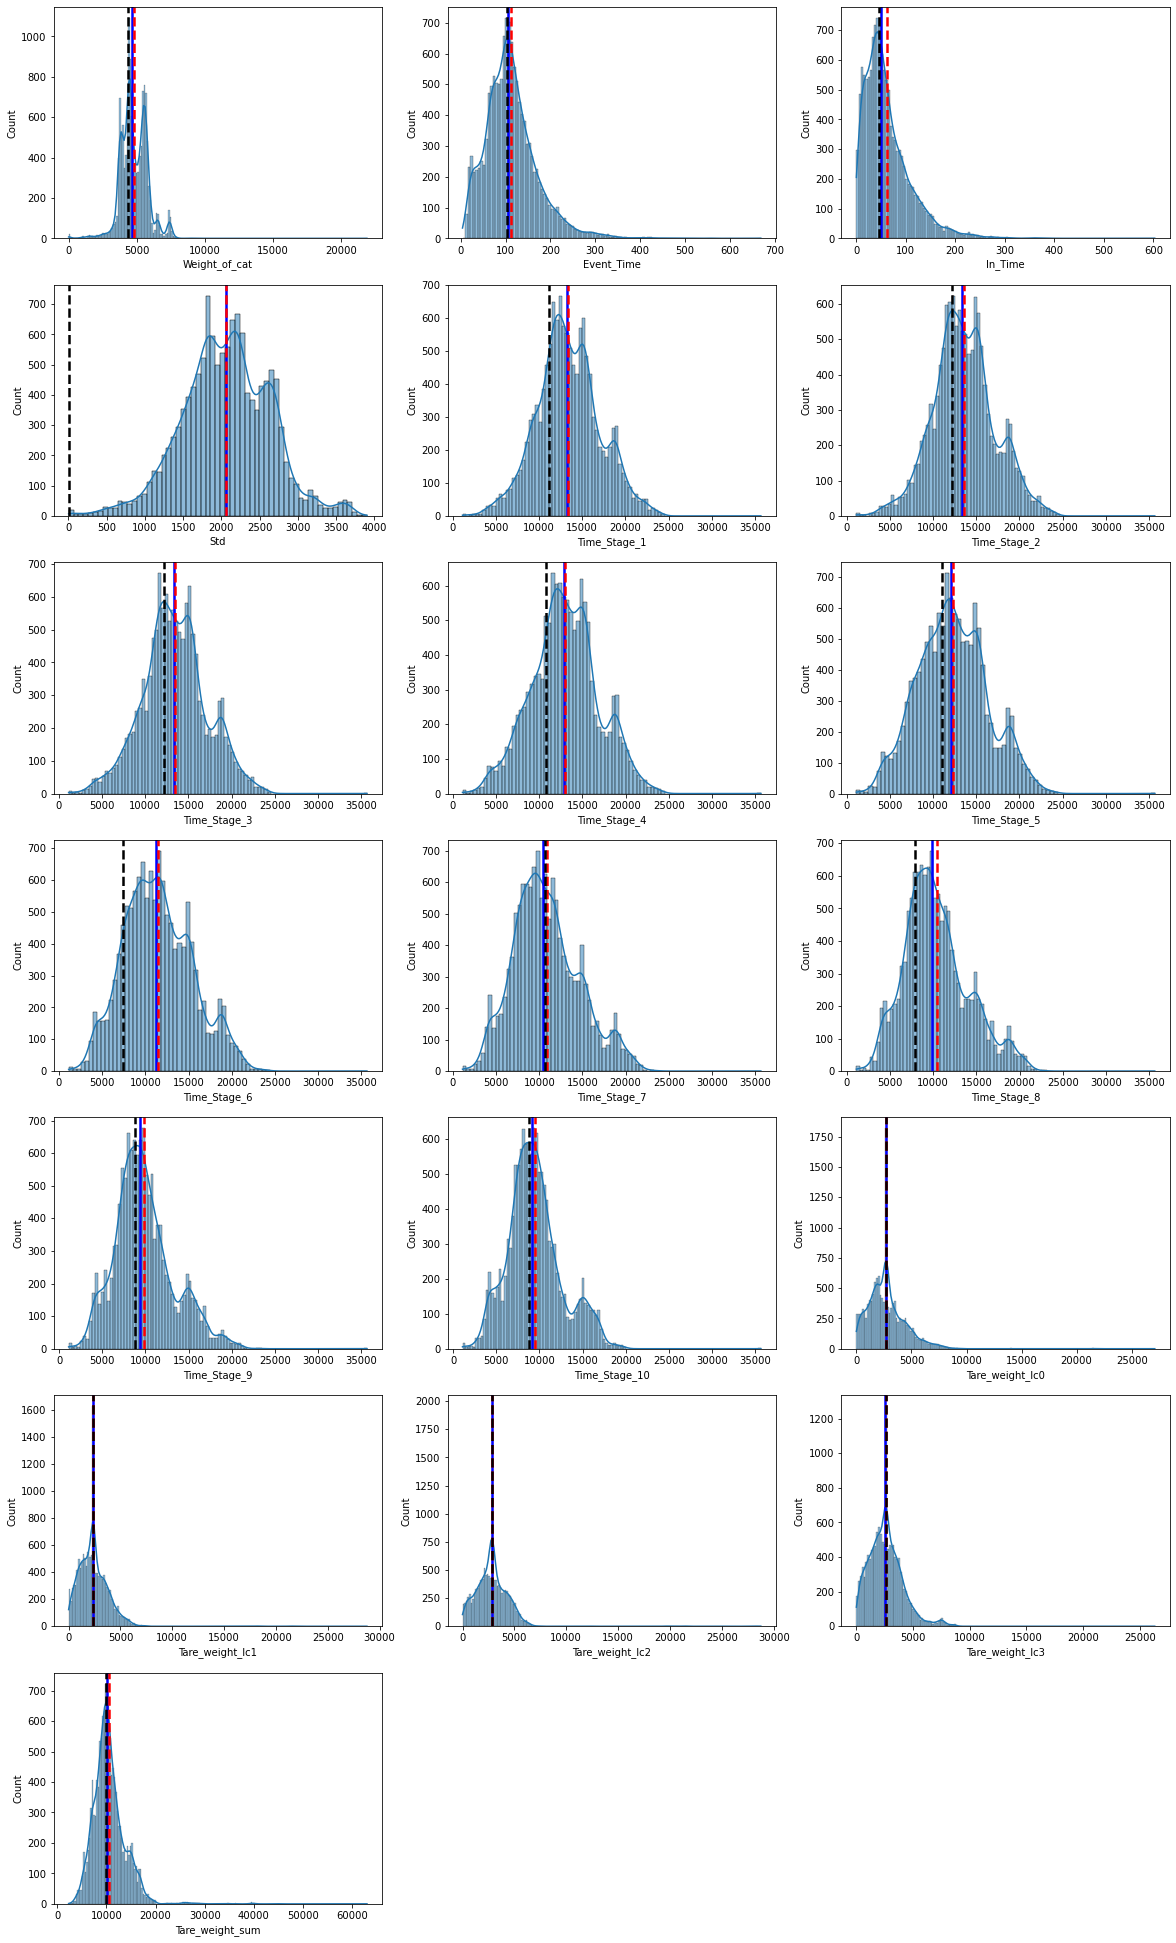

In [517]:
hist_plot(df)

# Data exploration

<AxesSubplot:xlabel='target_variable2', ylabel='In_Time'>

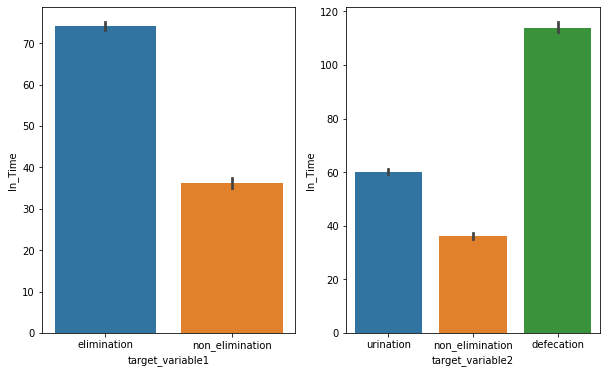

In [518]:
# Time duration for cat activities
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='target_variable1',y='In_Time',data = df)
plt.subplot(1,2,2)
sns.barplot(x='target_variable2',y='In_Time',data = df)

<AxesSubplot:xlabel='target_variable1', ylabel='Std'>

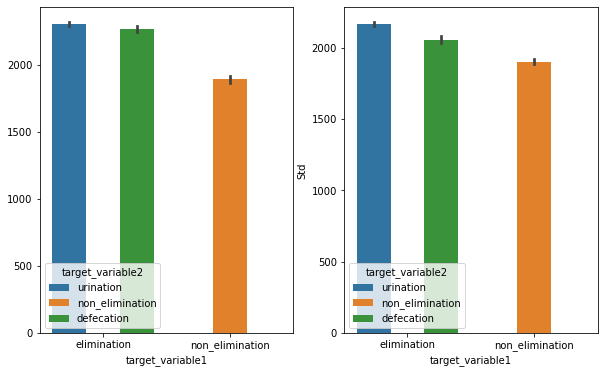

In [519]:
# mean of standard deviation for each activity
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='target_variable1',y=df[['Time_Stage_1','Time_Stage_2','Time_Stage_3','Time_Stage_4','Time_Stage_5','Time_Stage_6','Time_Stage_7','Time_Stage_8','Time_Stage_9','Time_Stage_10']].std(axis=1),data = df,hue='target_variable2')
plt.subplot(1,2,2)
sns.barplot(x='target_variable1',y='Std',hue='target_variable2',data=df)

<AxesSubplot:xlabel='target_variable2', ylabel='count'>

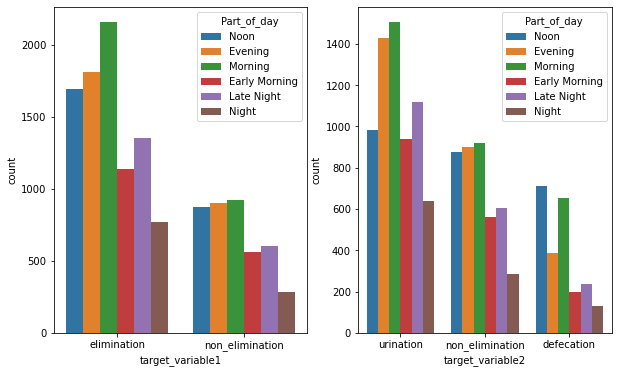

In [569]:
# elimination activity count during differnet part of the day
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='target_variable1',data=df,hue='Part_of_day')
plt.subplot(1,2,2)
sns.countplot(x='target_variable2',data=df,hue='Part_of_day')

# Classifier Model 1 Preparation

In [520]:
df_model1 = df.copy()
df_model1

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,Event_Time,In_Time,...,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day,target_variable1,target_variable2
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 15:56:11+00:00,"[urination, cat in box]",None,Ryan,6589,"[-569, 2968, -956, 5906]",151.974936,44.575,...,9984.0,9984.0,2717,2968,2847,5906,14438,Noon,elimination,urination
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 19:41:37+00:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,"[287, 1147, 1046, 1314]",111.975000,52.675,...,9325.0,9324.0,287,1147,1046,1314,3794,Evening,elimination,urination
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 20:43:43+00:00,"[cat in box, urination]",None,Ryan,5139,"[2223, 496, 926, 2584]",102.374944,44.150,...,8758.0,8745.0,2223,496,926,2584,6229,Evening,elimination,urination
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 17:02:05+00:00,"[non_elimination, cat in box]",None,Ryan,6983,"[976, 1199, 3104, -339]",66.374940,11.600,...,8792.0,8791.0,976,1199,3104,2603,7882,Evening,non_elimination,non_elimination
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 11:47:11+00:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,"[2691, 979, 2331, -412]",82.375000,48.800,...,5206.0,5205.0,2691,979,2331,2603,8604,Morning,elimination,urination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24 06:36:18+00:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",59.125914,48.200,...,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning,elimination,urination
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 11:29:01+00:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",132.144766,18.350,...,7746.0,7758.0,3577,400,2043,1747,7767,Morning,non_elimination,non_elimination
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27 08:47:55+00:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",137.820918,77.600,...,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning,elimination,urination
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02 06:15:57+00:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",205.381823,187.575,...,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning,elimination,defecation


In [521]:
df_model1.drop(columns=['Device_ID','Event_ID','Event_start_time','Tags','Free_text','Tare_weight','target_variable2'],inplace=True)

In [522]:
df_model1

,Name_of_cat,Weight_of_cat,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,...,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day,target_variable1
0,Ryan,6589,151.974936,44.575,2961.452803,16573.0,16565.0,10002.0,9993.0,9990.0,...,9985.0,9984.0,9984.0,2717,2968,2847,5906,14438,Noon,elimination
1,Ryan,6935,111.975000,52.675,3453.251838,16078.0,16278.0,16253.0,16246.0,9352.0,...,9325.0,9325.0,9324.0,287,1147,1046,1314,3794,Evening,elimination
2,Ryan,5139,102.374944,44.150,2572.058837,14241.0,13895.0,13846.0,14149.0,8880.0,...,8782.0,8758.0,8745.0,2223,496,926,2584,6229,Evening,elimination
3,Ryan,6983,66.374940,11.600,2384.826901,15720.0,8805.0,8801.0,8798.0,8796.0,...,8792.0,8792.0,8791.0,976,1199,3104,2603,7882,Evening,non_elimination
4,Ryan,7017,82.375000,48.800,3379.644350,12120.0,11953.0,12189.0,12222.0,12213.0,...,5209.0,5206.0,5205.0,2691,979,2331,2603,8604,Morning,elimination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,Sparkler,4116,59.125914,48.200,1583.759646,11363.0,10520.0,10677.0,11148.0,11142.0,...,11227.0,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning,elimination
13071,Sparkler,4604,132.144766,18.350,1390.112340,7772.0,7767.0,7754.0,7764.0,12173.0,...,7748.0,7746.0,7758.0,3577,400,2043,1747,7767,Morning,non_elimination
13072,Sparkler,4416,137.820918,77.600,2186.401587,12088.0,12086.0,12084.0,12054.0,12104.0,...,7673.0,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning,elimination
13073,Sparkler,4386,205.381823,187.575,976.953183,11994.0,12032.0,12029.0,12032.0,12032.0,...,12031.0,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning,elimination


# Outlier treatment

In [523]:
df_model1_ot = df_model1.copy()

In [524]:
#Box Plot
def box_plot(data,q=1.75):
    fields=list(data.select_dtypes([np.number]).columns)
    max_l = len(max(list(data.columns),key = len))+1
    plt.figure(figsize=(20,40))
    i=0
    for field in fields:
        plt.subplot(8,3,i+1)
        i+=1
        sns.boxplot(x = data[field])
        IQR = data[field].quantile(0.75)-data[field].quantile(0.25)
        lower_boundary = data[field].quantile(0.25)-q*IQR
        upper_boundary = data[field].quantile(0.75)+q*IQR
        outlier_percentage = (data[(data[field]<lower_boundary) | (data[field]>upper_boundary)][field].count()/data[field].count())*100
        print(field.ljust(max_l,' ')+':'+'('+str(int(lower_boundary))+' , '+str(int(upper_boundary))+')'+':'+str(outlier_percentage)+'%')
        plt.axvline(lower_boundary,color='red',ls='--', lw=2.5)
        plt.axvline(upper_boundary,color='black',ls='--', lw=2.5)

In [525]:
def outlier_drop(data,q=1.75):
        fields=list(data.select_dtypes([np.number]).columns)
        for field in fields:
            IQR = data[field].quantile(0.75)-data[field].quantile(0.25)
            lower_boundary = data[field].quantile(0.25)-q*IQR
            upper_boundary = data[field].quantile(0.75)+q*IQR
            data.drop(data[(data[field]<lower_boundary) | (data[field]>upper_boundary)].index, inplace = True)

Weight_of_cat    :(208 , 9469):0.2217973231357553%
Event_Time       :(-124 , 340):0.42065009560229444%
In_Time          :(-130 , 242):0.6730401529636711%
Std              :(-589 , 4748):0.0%
Time_Stage_1     :(-2573 , 29287):0.0076481835564053535%
Time_Stage_2     :(-1717 , 28750):0.0076481835564053535%
Time_Stage_3     :(-2538 , 29266):0.0076481835564053535%
Time_Stage_4     :(-3999 , 29947):0.0076481835564053535%
Time_Stage_5     :(-7172 , 31524):0.0076481835564053535%
Time_Stage_6     :(-8079 , 30914):0.0076481835564053535%
Time_Stage_7     :(-6978 , 28305):0.0076481835564053535%
Time_Stage_8     :(-5933 , 26228):0.0076481835564053535%
Time_Stage_9     :(-4466 , 23708):0.0076481835564053535%
Time_Stage_10    :(-3264 , 21740):0.0076481835564053535%
Tare_weight_lc0  :(-4166 , 9274):0.12237093690248566%
Tare_weight_lc1  :(-3972 , 8530):0.19885277246653918%
Tare_weight_lc2  :(-3705 , 9210):0.37476099426386233%
Tare_weight_lc3  :(-4105 , 9065):0.03824091778202677%
Tare_weight_sum  :(-190

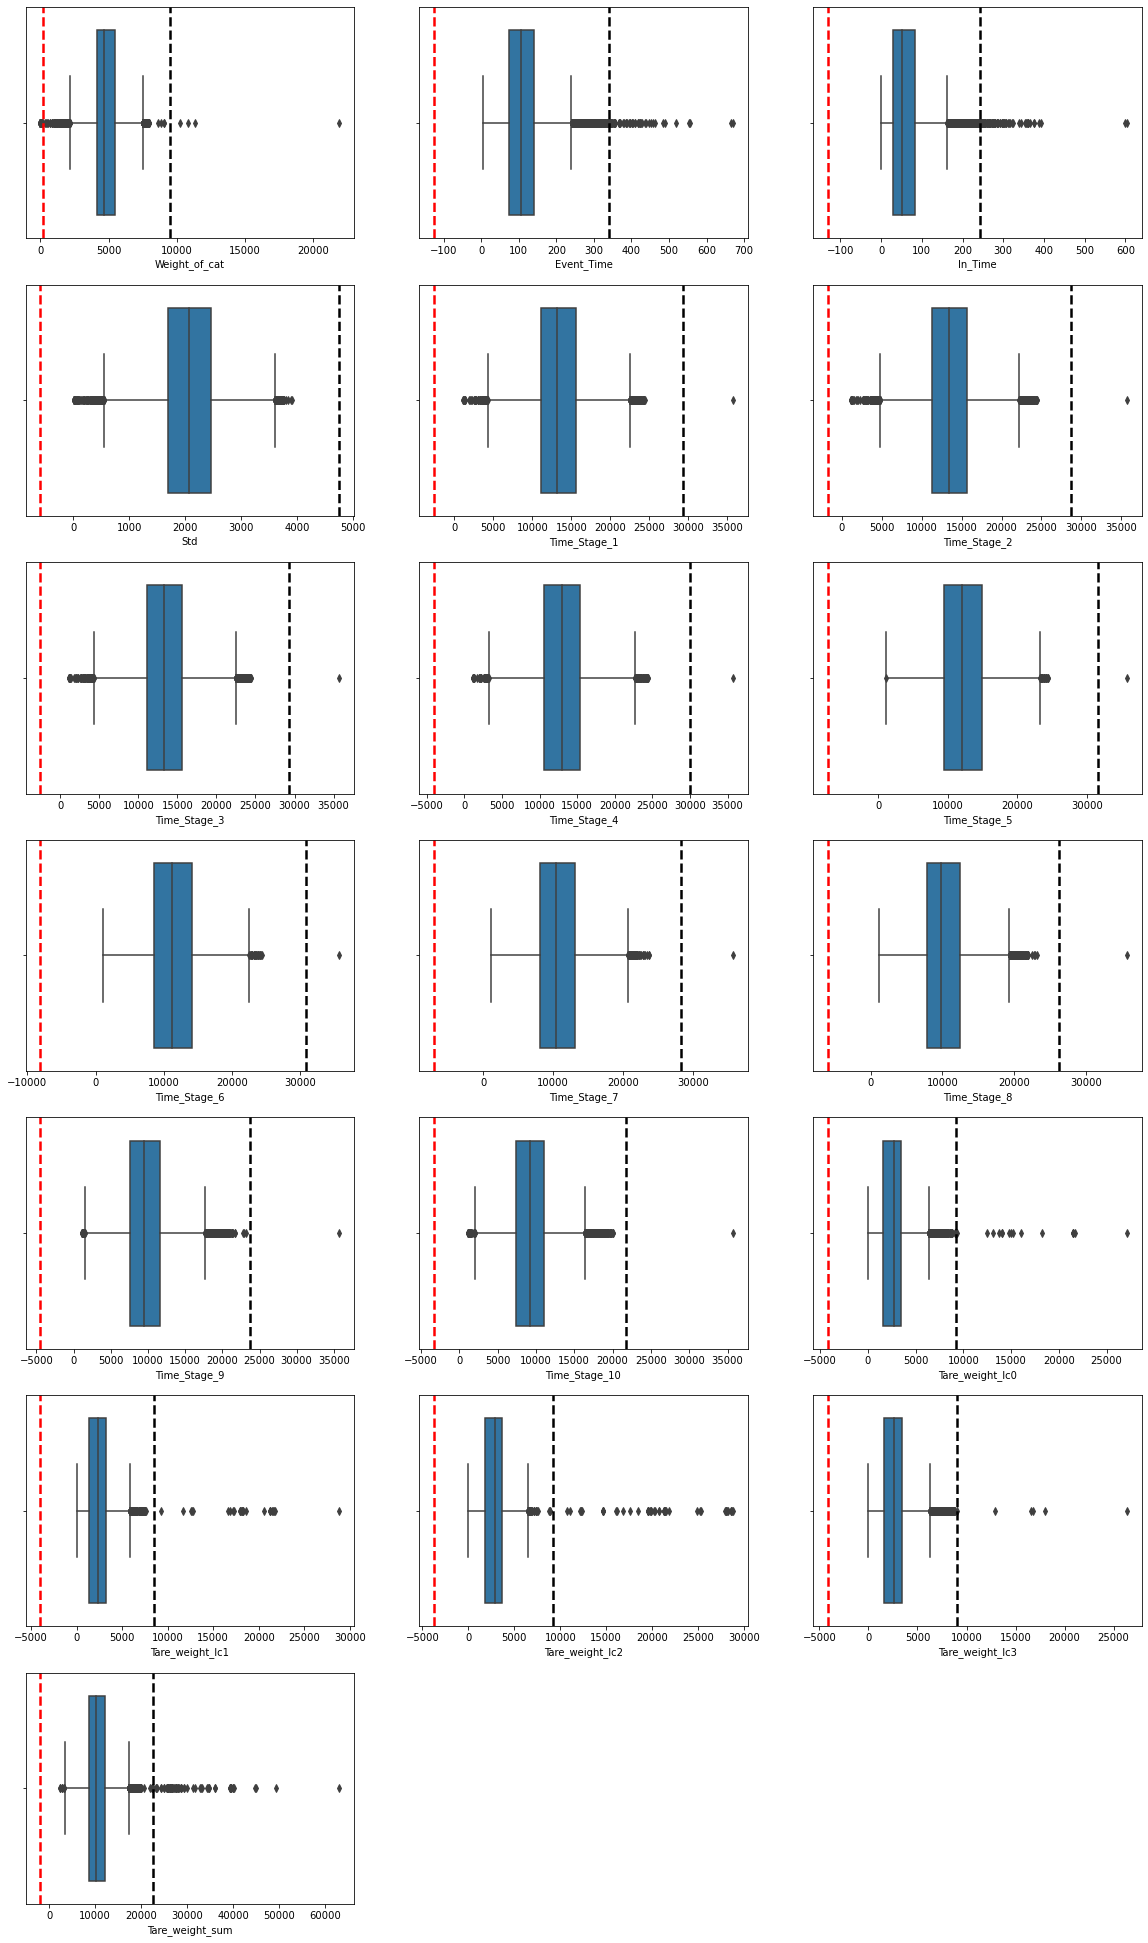

In [526]:
box_plot(df_model1_ot,3)

Weight_of_cat    :(208 , 9469):0.0%
Event_Time       :(-124 , 338):0.0077827068254338865%
In_Time          :(-126 , 238):0.0544789477780372%
Std              :(-588 , 4756):0.0%
Time_Stage_1     :(-2576 , 29316):0.0%
Time_Stage_2     :(-1724 , 28782):0.0%
Time_Stage_3     :(-2455 , 29213):0.0%
Time_Stage_4     :(-4014 , 29971):0.0%
Time_Stage_5     :(-7158 , 31517):0.0%
Time_Stage_6     :(-8023 , 30855):0.0%
Time_Stage_7     :(-6894 , 28204):0.0%
Time_Stage_8     :(-5839 , 26102):0.0%
Time_Stage_9     :(-4410 , 23660):0.0%
Time_Stage_10    :(-3220 , 21700):0.0%
Tare_weight_lc0  :(-4128 , 9228):0.0%
Tare_weight_lc1  :(-3962 , 8498):0.0%
Tare_weight_lc2  :(-3674 , 9157):0.0%
Tare_weight_lc3  :(-4084 , 9034):0.0%
Tare_weight_sum  :(-1747 , 22298):0.0%


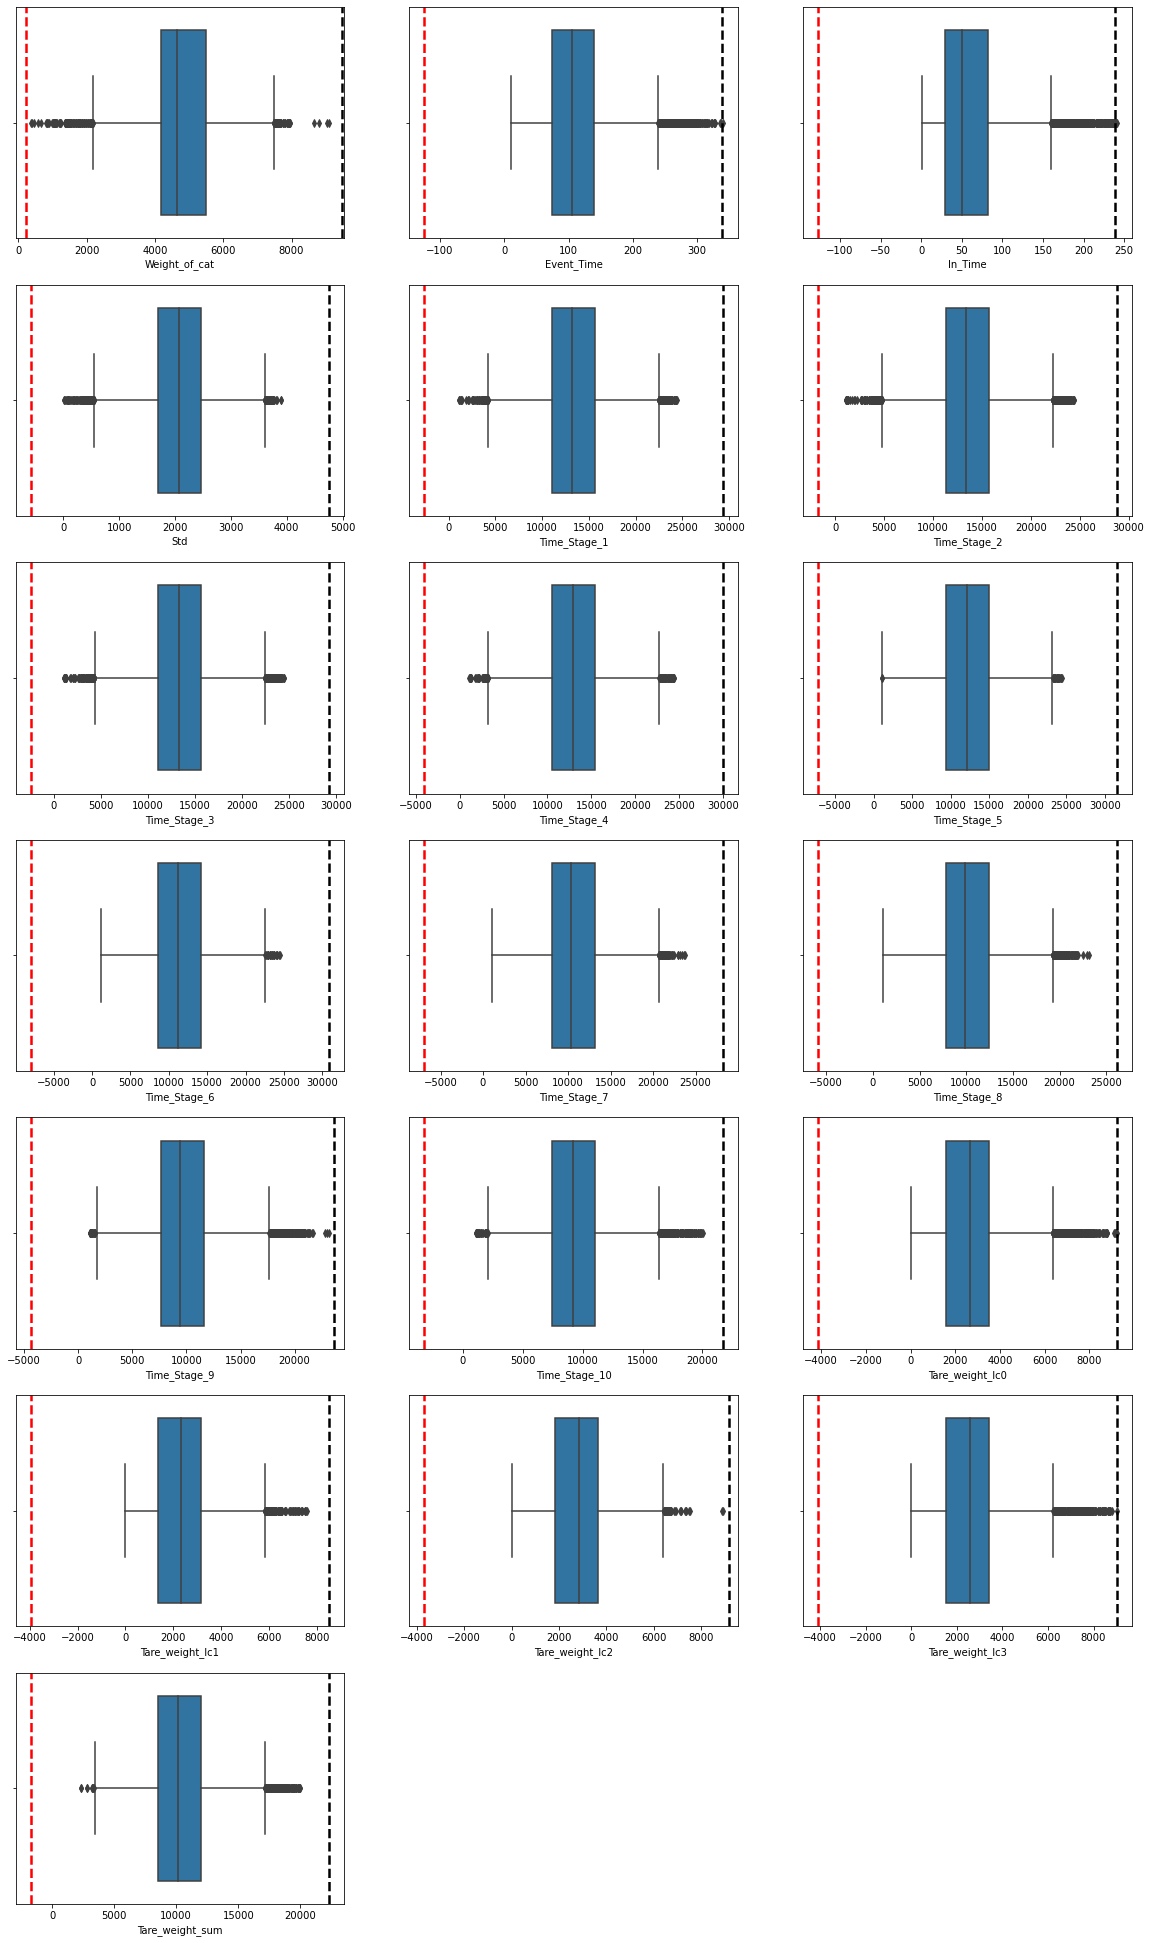

In [527]:
outlier_drop(df_model1_ot,3)
box_plot(df_model1_ot,3)

# Correlation

In [528]:
df_model1_ot_cor = df_model1_ot.copy()
df_model1_ot_cor['target_variable1']=np.where(df_model1_ot_cor['target_variable1']=='elimination',1,0)

In [530]:
def correlation_plot(data,threshold):
    numeric_cols=list(data.select_dtypes([np.number]).columns)
    corr = data[numeric_cols].corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr[corr>=threshold], cmap="Reds",annot=True)

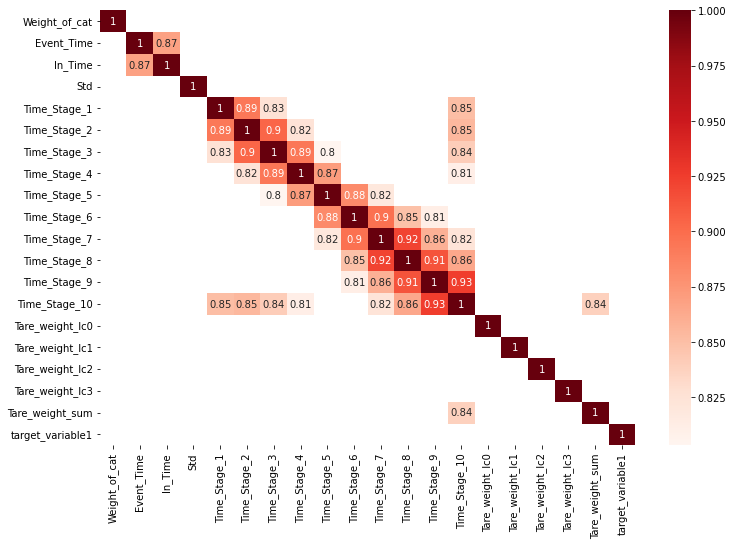

In [611]:
correlation_plot(df_model1_ot_cor,0.8)

In [609]:
numeric_cols=list(df_model1_ot_cor.select_dtypes([np.number]).columns)
feature_importance=df_model1_ot_cor[numeric_cols].corrwith(other=df_model1_ot_cor['target_variable1'])
feature_importance.drop(feature_importance.index[-1],inplace=True)
feature_importance

Weight_of_cat      0.030549
Event_Time         0.405882
In_Time            0.396312
Std                0.183971
Time_Stage_1       0.198204
Time_Stage_2       0.212982
Time_Stage_3       0.251958
Time_Stage_4       0.234066
Time_Stage_5       0.164942
Time_Stage_6       0.110178
Time_Stage_7       0.092273
Time_Stage_8       0.109417
Time_Stage_9       0.107769
Time_Stage_10      0.074471
Tare_weight_lc0    0.035678
Tare_weight_lc1    0.053283
Tare_weight_lc2    0.088036
Tare_weight_lc3   -0.013848
Tare_weight_sum    0.078656
dtype: float64

Text(0.5, 0, 'Feature Importance')

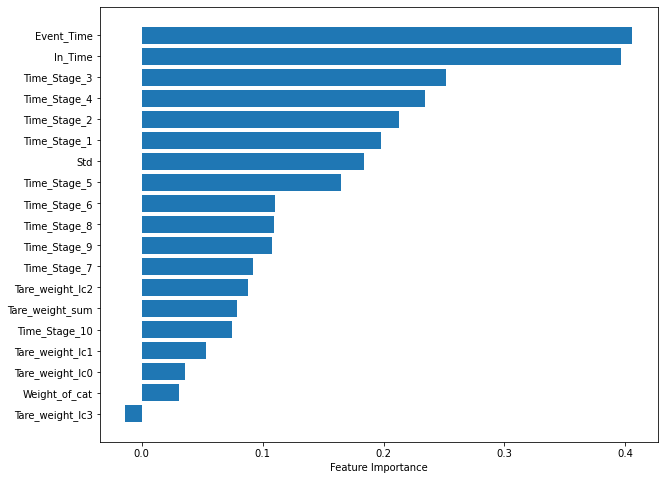

In [610]:
#correlation coefficient of features with Target variable
plt.figure(figsize=(10,8))
sort = feature_importance.argsort()
plt.barh(feature_importance.index[sort],feature_importance[sort])
plt.xlabel('Feature Importance')

# Encoding of Categorical features

In [532]:
df_model1_ot

,Name_of_cat,Weight_of_cat,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,...,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day,target_variable1
0,Ryan,6589,151.974936,44.575,2961.452803,16573.0,16565.0,10002.0,9993.0,9990.0,...,9985.0,9984.0,9984.0,2717,2968,2847,5906,14438,Noon,elimination
1,Ryan,6935,111.975000,52.675,3453.251838,16078.0,16278.0,16253.0,16246.0,9352.0,...,9325.0,9325.0,9324.0,287,1147,1046,1314,3794,Evening,elimination
2,Ryan,5139,102.374944,44.150,2572.058837,14241.0,13895.0,13846.0,14149.0,8880.0,...,8782.0,8758.0,8745.0,2223,496,926,2584,6229,Evening,elimination
3,Ryan,6983,66.374940,11.600,2384.826901,15720.0,8805.0,8801.0,8798.0,8796.0,...,8792.0,8792.0,8791.0,976,1199,3104,2603,7882,Evening,non_elimination
4,Ryan,7017,82.375000,48.800,3379.644350,12120.0,11953.0,12189.0,12222.0,12213.0,...,5209.0,5206.0,5205.0,2691,979,2331,2603,8604,Morning,elimination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,Sparkler,4116,59.125914,48.200,1583.759646,11363.0,10520.0,10677.0,11148.0,11142.0,...,11227.0,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning,elimination
13071,Sparkler,4604,132.144766,18.350,1390.112340,7772.0,7767.0,7754.0,7764.0,12173.0,...,7748.0,7746.0,7758.0,3577,400,2043,1747,7767,Morning,non_elimination
13072,Sparkler,4416,137.820918,77.600,2186.401587,12088.0,12086.0,12084.0,12054.0,12104.0,...,7673.0,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning,elimination
13073,Sparkler,4386,205.381823,187.575,976.953183,11994.0,12032.0,12029.0,12032.0,12032.0,...,12031.0,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning,elimination


In [533]:
df_model1_ot_enc = df_model1_ot.drop(columns=['Name_of_cat'])

In [534]:
df_model1_ot_enc['target_variable1']=np.where(df_model1_ot_enc['target_variable1']=='elimination',1,0)

In [535]:
df_model1_ot_enc

,Weight_of_cat,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,...,Time_Stage_8,Time_Stage_9,Time_Stage_10,Tare_weight_lc0,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Part_of_day,target_variable1
0,6589,151.974936,44.575,2961.452803,16573.0,16565.0,10002.0,9993.0,9990.0,9987.0,...,9985.0,9984.0,9984.0,2717,2968,2847,5906,14438,Noon,1
1,6935,111.975000,52.675,3453.251838,16078.0,16278.0,16253.0,16246.0,9352.0,9329.0,...,9325.0,9325.0,9324.0,287,1147,1046,1314,3794,Evening,1
2,5139,102.374944,44.150,2572.058837,14241.0,13895.0,13846.0,14149.0,8880.0,8833.0,...,8782.0,8758.0,8745.0,2223,496,926,2584,6229,Evening,1
3,6983,66.374940,11.600,2384.826901,15720.0,8805.0,8801.0,8798.0,8796.0,8794.0,...,8792.0,8792.0,8791.0,976,1199,3104,2603,7882,Evening,0
4,7017,82.375000,48.800,3379.644350,12120.0,11953.0,12189.0,12222.0,12213.0,12188.0,...,5209.0,5206.0,5205.0,2691,979,2331,2603,8604,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,4116,59.125914,48.200,1583.759646,11363.0,10520.0,10677.0,11148.0,11142.0,10705.0,...,11227.0,7030.0,7031.0,2340,868,2150,1626,6984,Early Morning,1
13071,4604,132.144766,18.350,1390.112340,7772.0,7767.0,7754.0,7764.0,12173.0,7751.0,...,7748.0,7746.0,7758.0,3577,400,2043,1747,7767,Morning,0
13072,4416,137.820918,77.600,2186.401587,12088.0,12086.0,12084.0,12054.0,12104.0,7681.0,...,7673.0,7672.0,7670.0,4313,2386,1754,1697,10150,Early Morning,1
13073,4386,205.381823,187.575,976.953183,11994.0,12032.0,12029.0,12032.0,12032.0,12028.0,...,12031.0,11972.0,7646.0,3702,2386,1561,1940,9589,Early Morning,1


In [536]:
df_dummy  = pd.get_dummies(data=df_model1_ot_enc['Part_of_day'])

In [537]:
df_model1_ot_enc = pd.concat([df_model1_ot_enc,df_dummy],axis=1)
df_model1_ot_enc.drop(columns='Part_of_day',inplace=True)

In [538]:
df_model1_ot_enc

,Weight_of_cat,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,...,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,target_variable1,Early Morning,Evening,Late Night,Morning,Night,Noon
0,6589,151.974936,44.575,2961.452803,16573.0,16565.0,10002.0,9993.0,9990.0,9987.0,...,2847,5906,14438,1,0,0,0,0,0,1
1,6935,111.975000,52.675,3453.251838,16078.0,16278.0,16253.0,16246.0,9352.0,9329.0,...,1046,1314,3794,1,0,1,0,0,0,0
2,5139,102.374944,44.150,2572.058837,14241.0,13895.0,13846.0,14149.0,8880.0,8833.0,...,926,2584,6229,1,0,1,0,0,0,0
3,6983,66.374940,11.600,2384.826901,15720.0,8805.0,8801.0,8798.0,8796.0,8794.0,...,3104,2603,7882,0,0,1,0,0,0,0
4,7017,82.375000,48.800,3379.644350,12120.0,11953.0,12189.0,12222.0,12213.0,12188.0,...,2331,2603,8604,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,4116,59.125914,48.200,1583.759646,11363.0,10520.0,10677.0,11148.0,11142.0,10705.0,...,2150,1626,6984,1,1,0,0,0,0,0
13071,4604,132.144766,18.350,1390.112340,7772.0,7767.0,7754.0,7764.0,12173.0,7751.0,...,2043,1747,7767,0,0,0,0,1,0,0
13072,4416,137.820918,77.600,2186.401587,12088.0,12086.0,12084.0,12054.0,12104.0,7681.0,...,1754,1697,10150,1,1,0,0,0,0,0
13073,4386,205.381823,187.575,976.953183,11994.0,12032.0,12029.0,12032.0,12032.0,12028.0,...,1561,1940,9589,1,1,0,0,0,0,0


# Data split and model building

In [539]:
x = df_model1_ot_enc.drop('target_variable1',axis = 1)
y = df_model1_ot_enc['target_variable1']

In [540]:
features = list(x.columns)

In [541]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [542]:
x_train

,Weight_of_cat,Event_Time,In_Time,Std,Time_Stage_1,Time_Stage_2,Time_Stage_3,Time_Stage_4,Time_Stage_5,Time_Stage_6,...,Tare_weight_lc1,Tare_weight_lc2,Tare_weight_lc3,Tare_weight_sum,Early Morning,Evening,Late Night,Morning,Night,Noon
7968,4107,27.988603,11.650,1973.580072,8145.0,9523.0,8145.0,8145.0,12154.0,12178.0,...,470,4835,2603,10023,0,0,0,0,0,1
8845,5054,87.164625,38.475,1976.887839,4096.0,6460.0,9124.0,9166.0,9171.0,5988.0,...,678,937,1993,6325,0,0,0,1,0,0
4199,5363,163.174932,100.225,2570.252778,16952.0,16877.0,16945.0,16956.0,16875.0,16961.0,...,4345,561,5960,13583,0,1,0,0,0,0
10933,4434,28.774930,9.950,1800.063845,9766.0,9766.0,13985.0,13916.0,13389.0,10410.0,...,1160,3548,2998,9771,1,0,0,0,0,0
8688,5699,35.331450,22.500,2581.825765,7639.0,10620.0,10532.0,10795.0,10791.0,10789.0,...,897,2389,1046,5097,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,6026,174.374929,105.400,2909.596459,9063.0,9059.0,15107.0,15125.0,15123.0,15174.0,...,2125,2038,3914,9047,0,0,0,0,0,1
3317,5214,126.374937,35.575,2309.489177,14489.0,14499.0,9303.0,9294.0,9288.0,9286.0,...,2196,2233,1912,9285,0,0,0,0,0,1
9962,4379,39.779416,27.775,1909.719544,11332.0,13183.0,13146.0,13173.0,13162.0,13126.0,...,1269,1368,3939,8804,0,0,0,0,0,1
10940,4409,71.114651,47.575,1587.758377,13630.0,13501.0,15585.0,15573.0,15582.0,15572.0,...,1931,4485,2867,11172,0,0,0,1,0,0


In [543]:
#changing the data to array format
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# 1.Logistic Regression

In [544]:
from sklearn.preprocessing import StandardScaler

In [545]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [546]:
from sklearn.decomposition import PCA

In [547]:
pca = PCA()

In [548]:
x_train_sc_pca = pca.fit_transform(x_train_sc)

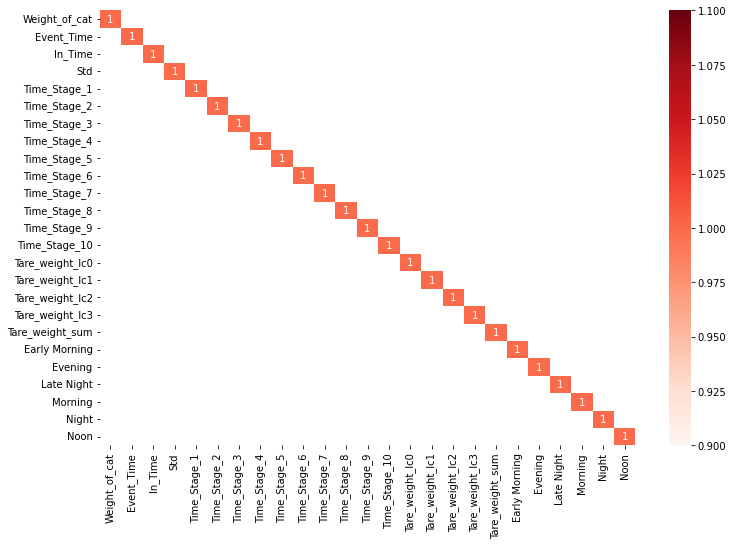

In [549]:
df_pca = pd.DataFrame(x_train_sc_pca,columns=features)
correlation_plot(df_pca,0.8)

In [550]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(x_train_sc_pca,y_train)

LogisticRegression(random_state=0)

In [551]:
y_predict = logistic_classifier.predict(pca.transform(x_test_sc))

In [552]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[ 533  291]
 [ 115 1631]]


0.842023346303502

# 2.KNearest Neighbors

In [553]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p = 2)
knn_classifier.fit(x_train_sc_pca,y_train)

KNeighborsClassifier(n_neighbors=10)

In [554]:
y_predict_knn = knn_classifier.predict(pca.transform(x_test_sc))

In [555]:
cm_knn = confusion_matrix(y_test,y_predict_knn)
print(cm_knn)
accuracy_score(y_test,y_predict_knn)

[[ 507  317]
 [  93 1653]]


0.8404669260700389

# 3.Decision Tree

In [556]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_classifier.fit(x_train_sc_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [557]:
y_predict_dt = dt_classifier.predict(pca.transform(x_test_sc))

In [558]:
cm_dt = confusion_matrix(y_test,y_predict_dt)
print(cm_dt)
accuracy_score(y_test,y_predict_dt)

[[ 524  300]
 [ 313 1433]]


0.7614785992217898

# 4.Random Forest

In [559]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_classifier.fit(x_train_sc_pca,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [560]:
y_predict_rf = rf_classifier.predict(pca.transform(x_test_sc))

In [561]:
cm_rf = confusion_matrix(y_test,y_predict_rf)
print(cm_rf)
accuracy_score(y_test,y_predict_rf)

[[ 562  262]
 [ 152 1594]]


0.8389105058365759